In [39]:
pip install pypandoc

  Using cached pypandoc-1.6.4-py3-none-win_amd64.whl (22.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Shale Gas Wells.csv')

In [3]:
df

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
0,140,38,850,0,165,8543,64,8.3,8200,17.1,38.0,0.95,3012,13.3
1,140,30,900,0,174,8336,60,7.8,8061,16.0,59.3,0.95,2771,12.5
2,140,30,900,0,174,9361,65,7.8,8061,16.0,59.3,0.95,3067,16.9
3,140,30,950,0,175,9110,69,8.3,7922,15.7,66.9,0.95,3130,16.5
4,140,30,950,0,175,9310,67,8.3,7922,15.7,66.9,0.95,2991,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,140,30,750,0,160,8567,63,7.2,8200,16.6,86.5,0.95,2740,12.8
502,140,30,700,0,160,7932,61,7.2,8200,16.6,86.5,0.95,2774,12.2
503,140,30,700,0,160,9080,57,7.2,8200,16.6,86.5,0.95,2973,13.3
504,140,30,750,0,160,8836,58,7.2,8200,16.6,86.5,0.95,2925,12.7


In [8]:
from sklearn.model_selection import train_test_split

In [22]:
X=df.iloc[:,0:13]
y=df.iloc[:,13].values
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()
xnorm=pd.DataFrame(data=mmsc.fit_transform(X))
yshape=pd.DataFrame(data=y.reshape(-1,1))
ynorm=pd.DataFrame(data=mmsc.fit_transform(yshape))



In [23]:

seed=50
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(xnorm, ynorm,
test_size=0.3)
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
#from keras_visualizer import visualizer
model=Sequential()
model.add(Dense(26, activation='relu',input_dim=13))
model.add(Dense(26, activation='relu'))
model.add(Dense(1))
np.random.seed(seed)
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping_monitor=EarlyStopping(patience=3)
history=model.fit(X_train,y_train,epochs=100,
validation_data=(X_test, y_test),
callbacks=[early_stopping_monitor])

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0629 - val_loss: 0.0347
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0281
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0259
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0249
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0234
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0224
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0216
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0198
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0191
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0181
Epoch 11

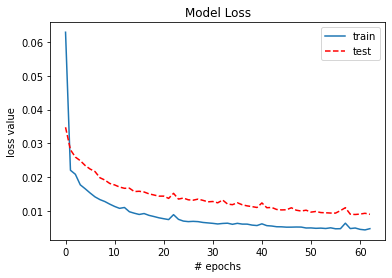

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"],"r--")
plt.title('Model Loss')
plt.ylabel('loss value')
plt.xlabel('# epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

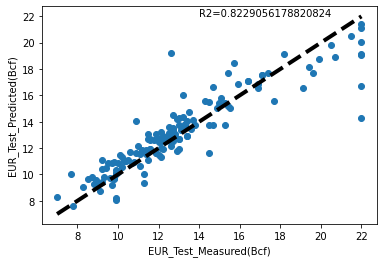

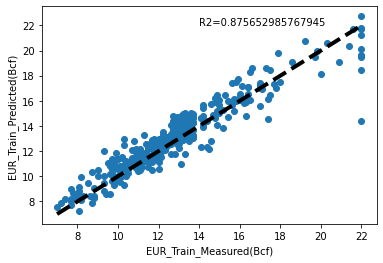

In [25]:
from sklearn.metrics import r2_score
EUR_test=y_test*(y.max()-y.min())+y.min()
EUR_train=y_train*(y.max()-y.min())+y.min()
EUR_test_prediction=model.predict(X_test)*(y.max()-y.min())+\
y.min()
EUR_train_prediction=model.predict(X_train)*(y.max()-y.min())+\
y.min()
r2_test=r2_score(EUR_test, EUR_test_prediction)
r2_train=r2_score(EUR_train, EUR_train_prediction)
fig, ax=plt.subplots()
ax.scatter(EUR_test, EUR_test_prediction)
ax.plot([EUR_test.min(), EUR_test.max()], [EUR_test.min(),
EUR_test.max()], 'k--', lw=4)
ax.set_xlabel('EUR_Test_Measured(Bcf)')
ax.set_ylabel('EUR_Test_Predicted(Bcf)')
plt.text(14,22,"R2="+str(r2_test).format("%.2f"))
fig, ax=plt.subplots()
ax.scatter(EUR_train, EUR_train_prediction)
ax.plot([EUR_train.min(), EUR_train.max()], [EUR_train.min(),
EUR_train.max()], 'k--', lw=4)
ax.set_xlabel('EUR_Train_Measured(Bcf)')
ax.set_ylabel('EUR_Train_Predicted(Bcf)')
plt.text(14,22,"R2="+str(r2_train).format("%.2f"))
plt.show()

# Part 2 - MLP Regressor

In [26]:
df1=pd.read_csv('PVT Data.csv')

In [33]:
x1=df1.iloc[:,0:4]
y1=df1.iloc[:,4].values
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
xnorm1=pd.DataFrame(data=sc.fit_transform(x1))
yshape=pd.DataFrame(data=y1.reshape(-1,1))
ynorm1=pd.DataFrame(data=sc.fit_transform(yshape))
print(ynorm1)

            0
0    0.709671
1    0.589595
2    0.236354
3    0.024077
4    0.069399
..        ...
244  0.240674
245  0.156046
246  0.063672
247  0.193863
248  0.636192

[249 rows x 1 columns]


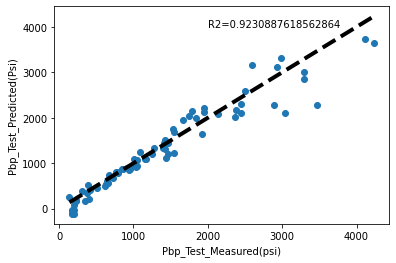

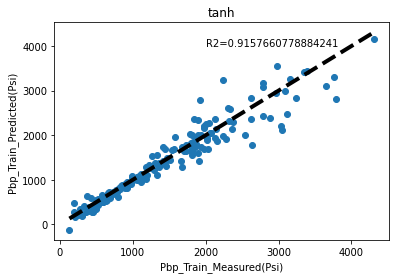

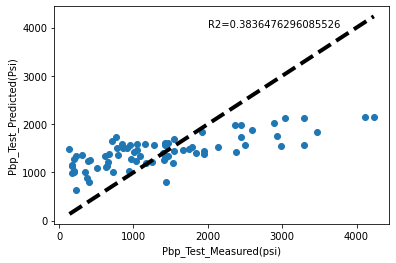

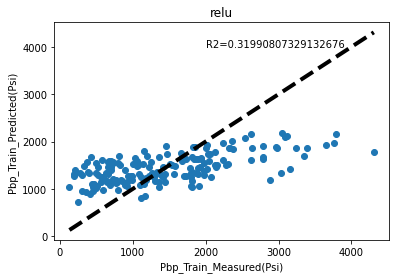

In [35]:
functions = ['tanh','relu']
for func in functions:
    import numpy as np
    seed=50
    np.random.seed(seed)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test=train_test_split(xnorm1, ynorm1,
    test_size=0.3)
    from sklearn.neural_network import MLPRegressor
    np.random.seed(seed)
    clf=MLPRegressor(hidden_layer_sizes=(7,7), activation=func, 
    solver='lbfgs', alpha=1,
    learning_rate_init=0.1, max_iter=200,
    random_state=None, tol=0.01)
    y_train_Ravel=y_train.values.ravel()
    clf.fit(X_train,y_train_Ravel)
    from sklearn.metrics import r2_score
    Pbp_test=y_test*(y.max()-y.min())+y.min()
    Ppb_train=y_train*(y.max()-y.min())+y.min()
    Pbp_test_prediction=clf.predict(X_test)*(y.max()-y.min())+\
    y.min()
    Pbp_train_prediction=clf.predict(X_train)*(y.max()-y.min())+\
    y.min()
    r2_test=r2_score(Pbp_test, Pbp_test_prediction)
    r2_train=r2_score(Ppb_train, Pbp_train_prediction)
    fig, ax=plt.subplots()
    ax.scatter(Pbp_test, Pbp_test_prediction)
    ax.plot([Pbp_test.min(), Pbp_test.max()], [Pbp_test.min(),
    Pbp_test.max()], 'k--', lw=4)
    ax.set_xlabel('Pbp_Test_Measured(psi)')
    ax.set_ylabel('Pbp_Test_Predicted(Psi)')
    plt.text(2000,4000,"R2="+str(r2_test).format("%.2f"))
    plt.show()
    fig, ax=plt.subplots()
    ax.scatter(Ppb_train, Pbp_train_prediction)
    ax.plot([Ppb_train.min(), Ppb_train.max()], [Ppb_train.min(),
    Ppb_train.max()], 'k--', lw=4)
    ax.set_xlabel('Pbp_Train_Measured(Psi)')
    ax.set_ylabel('Pbp_Train_Predicted(Psi)')
    ax.set_title(func)
    plt.text(2000,4000,"R2="+str(r2_train).format("%.2f"))
    plt.show()

In [40]:
import pypandoc

In [42]:
pypandoc.convert('Assignment 14.md','docx',outputfile='Assignment 14.docx')

C:\Users\aashr\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Due to possible ambiguity, 'convert()' is deprecated. Use 'convert_file()'  or 'convert_text()'.
  """Entry point for launching an IPython kernel.


''